This dataset consists of 101 animals from a zoo.  
There are 16 variables with various traits to describe the animals.  
The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate  

The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables.  
It is the perfect dataset for those who are new to learning Machine Learning.  

# zoo.csv  
Attribute Information: (name of attribute and type of value domain)  

1. animal_name: Unique for each instance  
2. hair Boolean  
3. feathers Boolean  
4. eggs Boolean  
5. milk Boolean  
6. airborne Boolean  
7. aquatic Boolean  
8. predator Boolean  
9. toothed Boolean  
10. backbone Boolean  
11. breathes Boolean  
12. venomous Boolean  
13. fins Boolean  
14. legs Numeric (set of values: {0,2,4,5,6,8})  
15. tail Boolean  
16. domestic Boolean  
17. catsize Boolean  
18. class_type Numeric (integer values in range [1,7])  

# class.csv  
This csv describes the dataset  

1. Class_Number Numeric (integer values in range [1,7])  
2. NumberOfAnimalSpeciesIn_Class Numeric  
3. Class_Type character -- The actual word description of the class  
4. Animal_Names character -- The list of the animals that fall in the category of the class  

# Acknowledgements  
UCI Machine Learning: https://archive.ics.uci.edu/ml/datasets/Zoo  

Source Information
-- Creator: Richard Forsyth  
-- Donor: Richard S. Forsyth  
8 Grosvenor Avenue  
Mapperley Park  
Nottingham NG3 5DX  
0602-621676  
-- Date: 5/15/1990  

# Inspiration  
What are the best machine learning ensembles/methods for classifying these animals based upon the variables given?

101마리의 동물원 동물에 대한 특징 16가지를 수집한 DataSet이다.  
zoo.csv는 각 동물과 특성에 대한 값들을 표기했다.  
class.csv는 동물을 laveling한 값들을 표기했다.   
Dummy Data Encoder를 사용해 보기위해 데이터를 가져와 봤는데 다리의 개수를 제외한 값들이 이미 처리가 되어있어서 그냥 데이터 분석을 해봐야 할것같다.

# DataSet 받아오기

In [56]:
import os
import numpy as np
import pandas as pd

In [57]:
DATA_PATH = os.path.join('data/zoo') # Data save folder

def load_zoo_data(): # Loading Data
    csv_path = os.path.join(DATA_PATH,'zoo.csv')
    return pd.read_csv(csv_path)

In [70]:
zoo = load_zoo_data()
label = zoo.class_type
zoo_val = zoo.iloc[:,1:17]
zoo_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
dtypes: int64(16)
memory usage: 12.8 KB


# pre-processing

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
# +로그 변환

In [60]:
mm = MinMaxScaler()
ma = MaxAbsScaler()
ss = StandardScaler()
rs = RobustScaler()
no = Normalizer()

zoo1 = pd.DataFrame(mm.fit_transform(zoo_val), columns=zoo_val.columns)
zoo2 = pd.DataFrame(ma.fit_transform(zoo_val), columns=zoo_val.columns)
zoo3 = pd.DataFrame(ss.fit_transform(zoo_val), columns=zoo_val.columns)
zoo4 = pd.DataFrame(rs.fit_transform(zoo_val), columns=zoo_val.columns)
zoo5 = pd.DataFrame(no.fit_transform(zoo_val), columns=zoo_val.columns)
zoo6 = pd.DataFrame(np.log1p(zoo_val))

# K-Means

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

km = KMeans(n_clusters=7, random_state=1)
predict0 = pd.DataFrame(km.fit_predict(zoo_val), columns=['predict'])
predict1 = pd.DataFrame(km.fit_predict(zoo1), columns=['predict'])
predict2 = pd.DataFrame(km.fit_predict(zoo2), columns=['predict'])
predict3 = pd.DataFrame(km.fit_predict(zoo3), columns=['predict'])
predict4 = pd.DataFrame(km.fit_predict(zoo4), columns=['predict'])
predict5 = pd.DataFrame(km.fit_predict(zoo5), columns=['predict'])
predict6 = pd.DataFrame(km.fit_predict(zoo6), columns=['predict'])

# 공부해보니 Accuracy score이라는 train data의 클러스터링 결과를 평가하는 함수가 있어 사용해 보았다. (올바른 데이터의 수/전체데이터의 수)

df = pd.concat([predict6['predict'], label], axis=1)

ct = pd.crosstab(df['predict'], df['class_type'])
ct

class_type,1,2,3,4,5,6,7
predict,,,,,,,
0,19,0,0,0,0,0,0
1,3,0,3,13,0,0,0
2,0,20,1,0,0,0,0
3,0,0,0,0,0,8,1
4,19,0,0,0,0,0,0
5,0,0,1,0,4,0,5
6,0,0,0,0,0,0,4


약 70% 정도의 정확도를 가지고 있는듯 하다.  
dummy encoding 되어있는 값에 유클리드 거리로 계산하는 K-means를 적용해서 이러한 결과가 나오는 것이라고 생각한다.  
아마 PCA도 별다른 효과가 없을 것 같다.
따라서 밀도 기반의 DBSCN 및 T-SNE clustering을 해보면 좋을 것 같다.

# T-SNE

In [62]:
from sklearn.manifold import TSNE

def tsne(x):
    model = TSNE(n_components=2, verbose=1, random_state=0)
    transformed = model.fit_transform(x)
    star_TSNE = pd.DataFrame(transformed, columns=['x','y'])
    return star_TSNE

In [63]:
tsne0 = tsne(zoo_val)
tsne1 = tsne(zoo1)
tsne2 = tsne(zoo2)
tsne3 = tsne(zoo3)
tsne4 = tsne(zoo4)
tsne5 = tsne(zoo5)
tsne6 = tsne(zoo6)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 101 samples in 0.000s...
[t-SNE] Computed neighbors for 101 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 101 / 101
[t-SNE] Mean sigma: 1.501806
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.116177
[t-SNE] KL divergence after 1000 iterations: 0.066359
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 101 samples in 0.000s...
[t-SNE] Computed neighbors for 101 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 101 / 101
[t-SNE] Mean sigma: 1.126704
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.912834
[t-SNE] KL divergence after 1000 iterations: 0.089264
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 101 samples in 0.000s...
[t-SNE] Computed neighbors for 101 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 101 / 101
[t-SNE] Mean sigma: 1.126704
[t-SNE] KL divergence after 250 iteratio

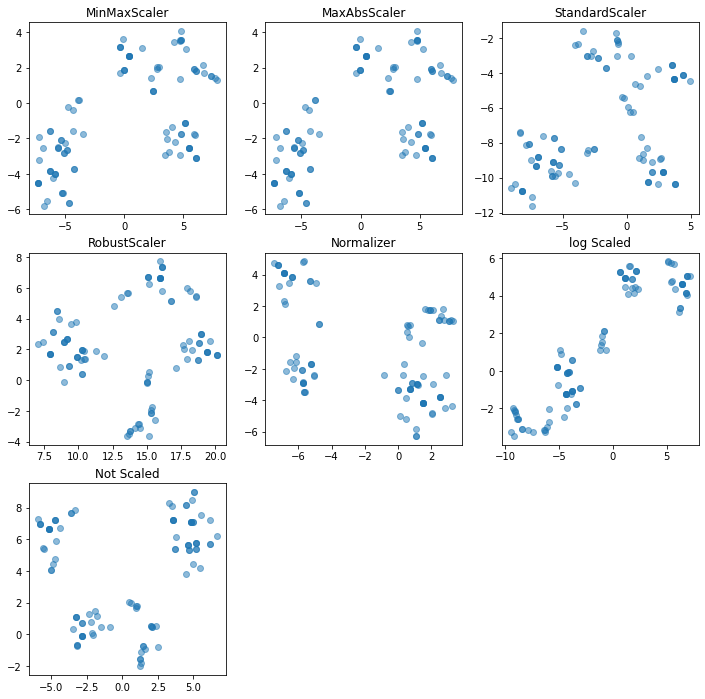

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

plt.subplot(331)
plt.scatter(tsne1.x, tsne1.y, alpha=0.5)
plt.title('MinMaxScaler')

plt.subplot(332)
plt.scatter(tsne2.x, tsne2.y, alpha=0.5)
plt.title('MaxAbsScaler')

plt.subplot(333)
plt.scatter(tsne3.x, tsne3.y, alpha=0.5)
plt.title('StandardScaler')

plt.subplot(334)
plt.scatter(tsne4.x, tsne4.y, alpha=0.5)
plt.title('RobustScaler')

plt.subplot(335)
plt.scatter(tsne5.x, tsne5.y, alpha=0.5)
plt.title('Normalizer')

plt.subplot(336)
plt.scatter(tsne0.x, tsne0.y, alpha=0.5)
plt.title('log Scaled')

plt.subplot(337)
plt.scatter(tsne6.x, tsne6.y, alpha=0.5)
plt.title('Not Scaled')


plt.show()

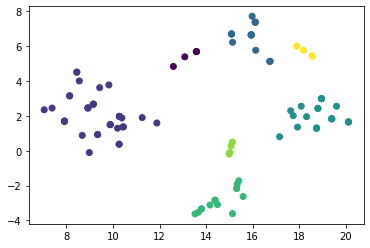

class_type,1,2,3,4,5,6,7
predict,,,,,,,
-1,4,0,0,0,0,0,0
0,37,0,0,0,0,0,0
1,0,0,3,13,0,0,0
2,0,20,1,0,0,0,0
3,0,0,0,0,0,8,6
4,0,0,1,0,4,0,0
5,0,0,0,0,0,0,4


In [74]:
from sklearn.cluster import DBSCAN # DBSCAN clustering
# create model and prediction
model = DBSCAN(eps=1.5,min_samples=5) # 주변 밀집도 4~6으로 설정 (ln(101))
predict = pd.DataFrame(model.fit_predict(tsne4), columns=['predict'])

plt.scatter(tsne4.x,tsne4.y,c=predict['predict'])
plt.show()

# print('Robust_Scaled: ', accuracy_score(labelling,predict))

df = pd.concat([predict['predict'], label], axis=1)

ct = pd.crosstab(df['predict'], df['class_type'])
ct

DBSCAN을 사용한 경우 약 90% 정도까지 정확도를 끌어낼수 있는 것을 볼 수 있다.